In [1]:
# Path setup
import sys
import os

%matplotlib inline

sys.path.append(os.path.dirname(os.path.join(os.getcwd(), "../src")))

In [2]:
from src import constants, utils, preprocess, training, yolo_tiny

Using TensorFlow backend.


In [3]:
MODEL_DIM = constants.MODEL_DIM
GRID_SIZE = constants.GRID_SIZE
NUM_BOX = constants.NUM_BOX
NUM_CLASS = constants.NUM_CLASS

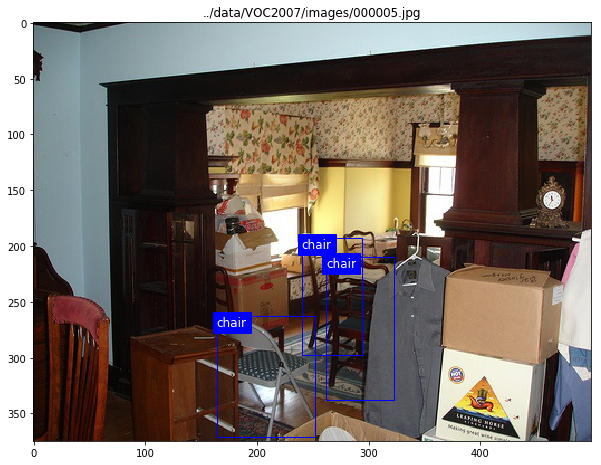

In [4]:
utils.visualize_label("../data/VOC2007/images/000005.jpg", "../data/VOC2007/labels/000005.txt")

In [5]:
ori_image = utils.load_image("../data/VOC2007/images/000005.jpg")
ori_labels = utils.load_labels("../data/VOC2007/labels/000005.txt")

In [6]:
processed_image = preprocess.preprocess_image(ori_image, MODEL_DIM)
bboxs = preprocess.generate_bboxs(ori_labels, ori_image, MODEL_DIM, GRID_SIZE, NUM_BOX, NUM_CLASS)

In [7]:
bboxs.shape

(7, 7, 50)

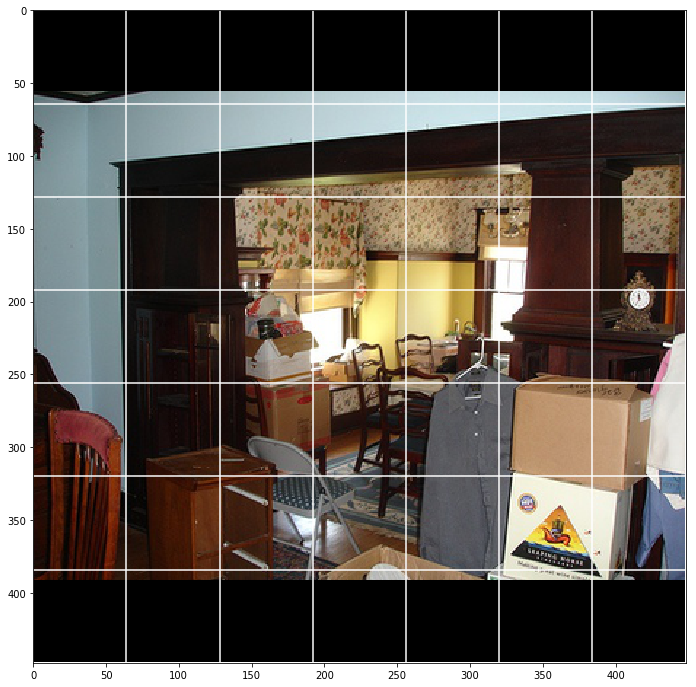

In [8]:
utils.draw_bboxs(processed_image, bboxs, MODEL_DIM)

In [9]:
# preprocess.preprocess_data("../data/VOC2007/images",
#                            "../data/VOC2007/labels",
#                            "../data/VOC2007/pre_images",
#                            "../data/VOC2007/pre_labels")

In [10]:
yolo_tiny_model = yolo_tiny.yolo_tiny_model()
yolo_tiny_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 448, 448, 3)  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 448, 448, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 448, 448, 16) 64          Conv1[0][0]                      
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 448, 448, 16) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_poolin

In [11]:
# training.train_yolo(
#     model,
#     train_X="../data/VOC2007/pre_images",
#     train_Y="../data/VOC2007/pre_labels",
#     batch_size=32,
#     epochs=20,
#     epoch_begin=0,
# )
yolo_tiny_model.load_weights("../model/yolo_tiny_weights.h5")

In [13]:
# training.evaluate_yolo(yolo_tiny_model, "../data/VOC2007/pre_images", "../data/VOC2007/pre_labels")